<a href="https://colab.research.google.com/github/kingajutrzenka/kurs-sztuczna-inteligencja-w-medycynie/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Konwolucyjne sieci neuronowe**

## **Działanie macierzy**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

image = plt.imread('chi.jpeg')
print(f'Input shape: {image.shape}')

Input shape: (554, 848, 3)


In [5]:
gray_image = rgb2gray(image) #zmiana odcieniu szarości
small_image = gray_image[::2,::2] #zmniejszenie co drugiego piksela

In [6]:
def apply_kernel_to_image(img, kernel, title=''):

    feature = convolve2d(img, kernel, boundary='symm', mode='same')

    #tworzenie wykresu

    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(img, 'gray')
    ax1.set_title('Input image', fontsize=15)
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(feature, 'gray')
    ax2.set_title(f'Feature map - {title}', fontsize=15)
    ax2.set_xticks([])
    ax2.set_yticks([])
    plt.show()

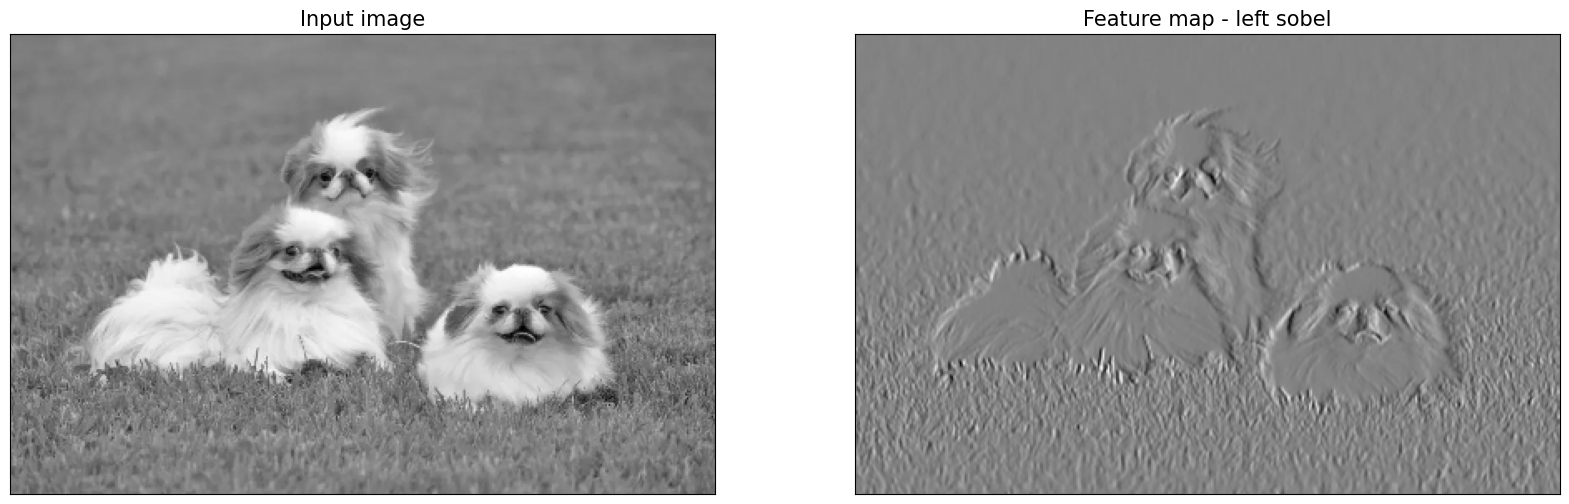

In [7]:
#left sobel
kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

apply_kernel_to_image(small_image, kernel, 'left sobel')

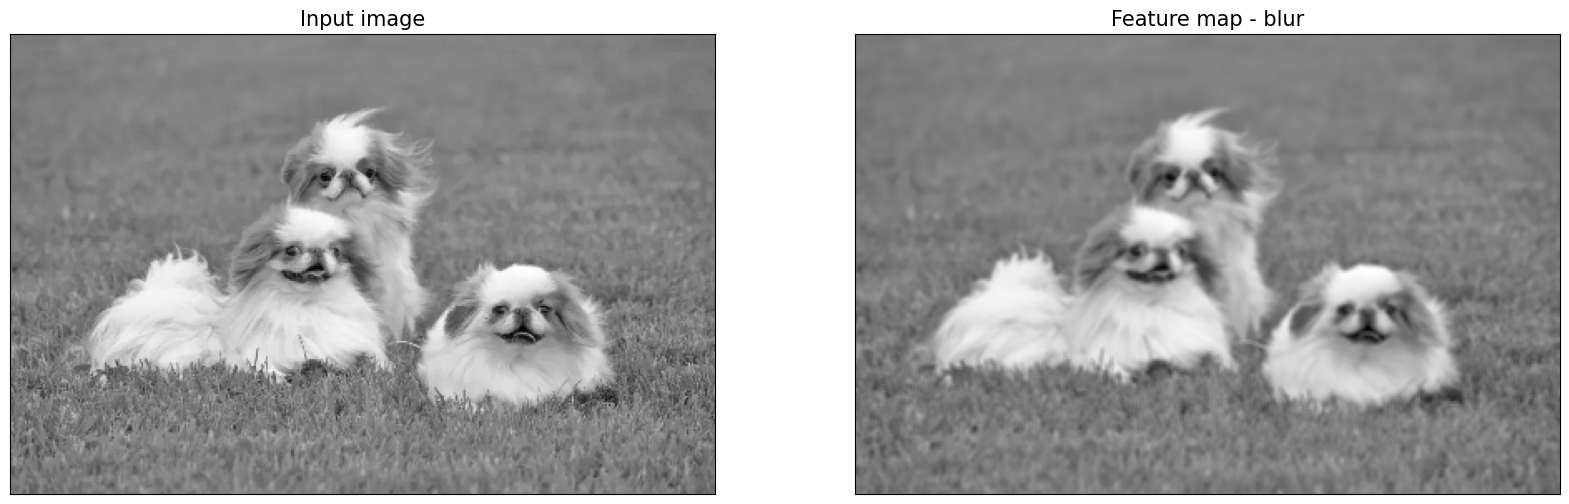

In [8]:
#blur
kernel = np.array([
    [0.01, 0.01, 0.01],
    [0.01, 0.01, 0.01],
    [0.01, 0.01, 0.01]])

apply_kernel_to_image(small_image, kernel, 'blur')

#ten blur to taki w teorii czasem

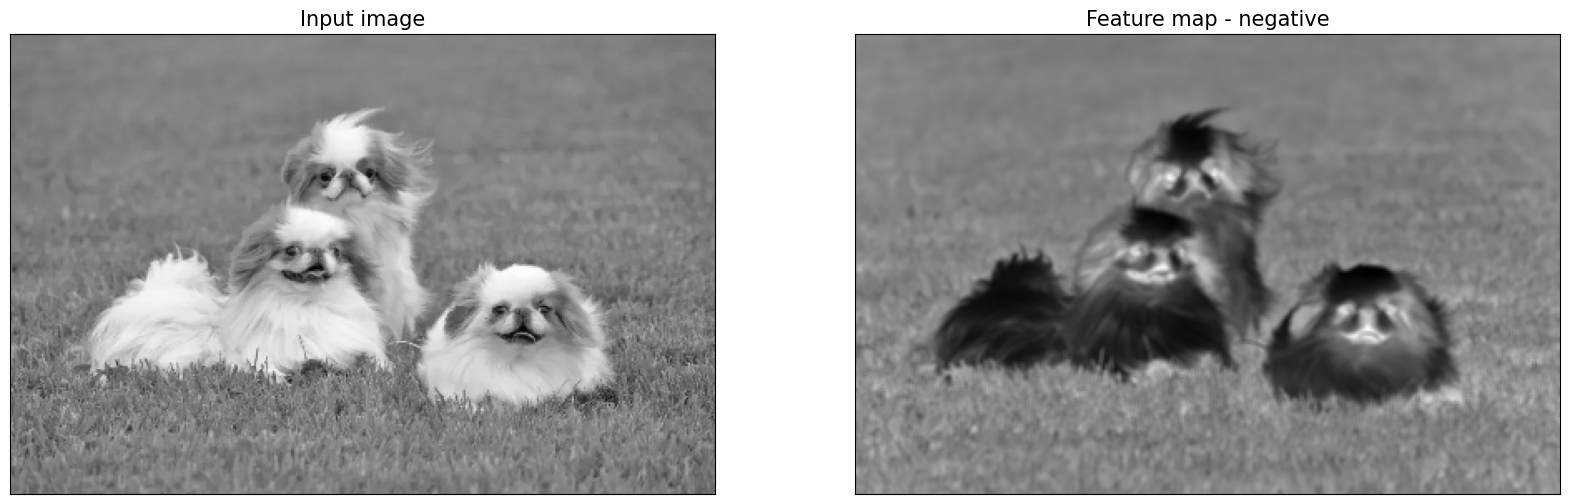

In [9]:
#negative
kernel = np.array([
    [-1, -1, -1],
    [-1, -1, -1],
    [-1, -1, -1]])

apply_kernel_to_image(small_image, kernel, 'negative')

## **Przykład**

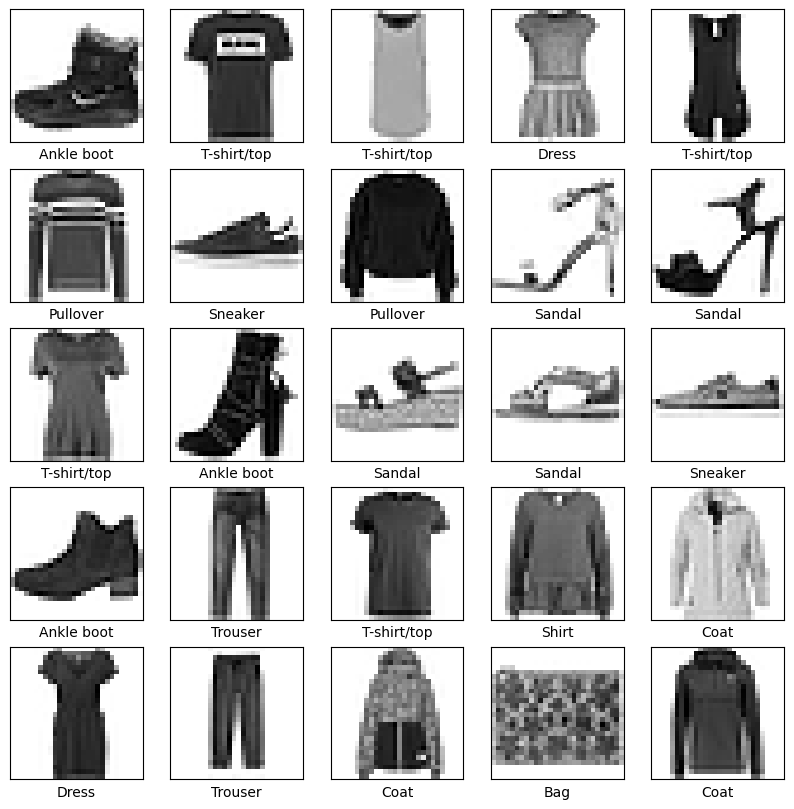

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

print(f'tensorflow version: {tf.__version__}')

#wczytanie danych
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

print(f'Zbiór uczący: {X_train.shape}, zbiór testowy: {X_val.shape}, zbiór walidacyjny: {X_val.shape}')

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

tensorflow version: 2.19.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Zbiór uczący: (45000, 28, 28), zbiór testowy: (10000, 28, 28), zbiór walidacyjny: (10000, 28, 28)


In [11]:
#dodatkowe funkcje
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, add, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [12]:
#funkcja do rysowania wykresu
def draw_curves(history, key1='accuracy', ylim1=(0.7, 1.00),
                key2='loss', ylim2=(0.0, 0.6)):
    plt.figure(figsize=(12,4))
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'test'], loc='best')

    plt.show()

### **Sieć neuronowa MLP**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7630 - loss: 0.6790 - val_accuracy: 0.8359 - val_loss: 0.4619
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8560 - loss: 0.3977 - val_accuracy: 0.8540 - val_loss: 0.3979
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8703 - loss: 0.3522 - val_accuracy: 0.8783 - val_loss: 0.3417
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8806 - loss: 0.3249 - val_accuracy: 0.8801 - val_loss: 0.3355
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8923 - loss: 0.2984 - val_accuracy: 0.8763 - val_loss: 0.3455
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8935 - loss: 0.2914 - val_accuracy: 0.8849 - val_loss: 0.3216
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8982 - loss: 0.2683 - val_accuracy: 0.8783 - val_loss: 0.3330
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9024 - loss: 0.2612 - val_

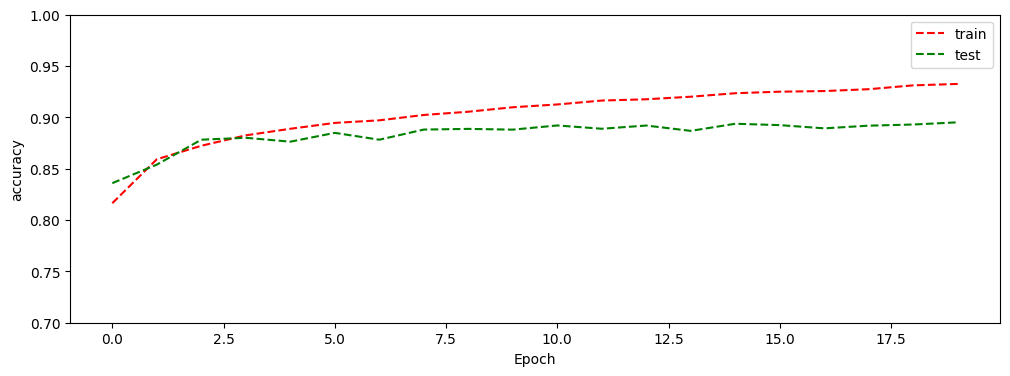

CNN Error: 11.51%


In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

EarlyStop = EarlyStopping(monitor='val_loss',
                          patience=5,
                          verbose=1)

history = model.fit(X_train, y_train,
                    epochs=100, verbose=1,
                    validation_data = (X_test, y_test),
                    callbacks = [EarlyStop],
                   )

draw_curves(history, key1='accuracy', key2='loss')

score = model.evaluate(X_val, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-score[1]*100))

Błąd na próbce walidacyjnej 11.51%

### **Konwolucyjne sieci neuronowe CNN**

In [14]:
#dodatkowy import

from tensorflow.keras.layers import Conv2D, MaxPool2D

In [15]:
# w przypadku CNN należy dodać jeszcze info o kanałach, jest 28, bo nasze obrazki mają wielkość 28x28
X_train_cnn = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_val_cnn = X_val.reshape((X_val.shape[0], 28, 28, 1))

**Pierwszy model**

In [16]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8116 - loss: 0.5282 - val_accuracy: 0.8906 - val_loss: 0.3112
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8976 - loss: 0.2812 - val_accuracy: 0.9041 - val_loss: 0.2684
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9145 - loss: 0.2373 - val_accuracy: 0.9023 - val_loss: 0.2689
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9223 - loss: 0.2067 - val_accuracy: 0.9137 - val_loss: 0.2423
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9334 - loss: 0.1749 - val_accuracy: 0.9147 - val_loss: 0.2403
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9444 - loss: 0.1519 - val_accuracy: 0.9117 - val_loss: 0.2549
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9512 - loss: 0.1329 - val_accuracy: 0.9127 - val_loss: 0.2578
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9585 - loss: 

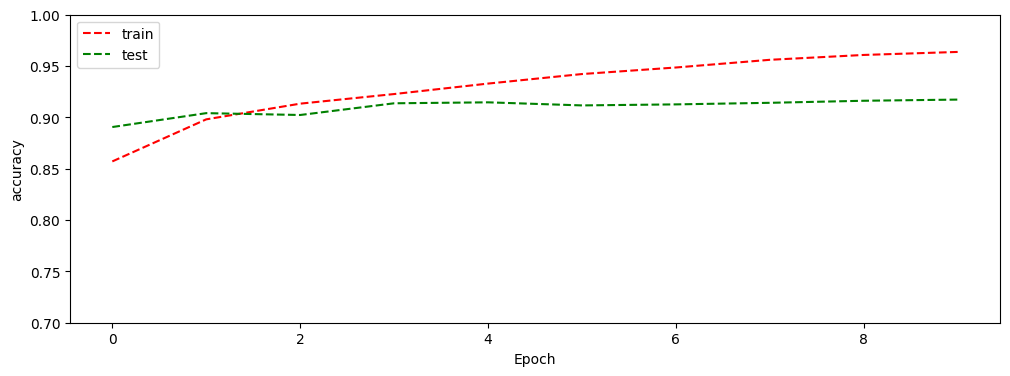

CNN Error: 8.90%


In [17]:
history = model.fit(X_train_cnn,
                    y_train,
                    epochs=100,
                    verbose=1,
                    validation_data = (X_test_cnn, y_test),
                    callbacks = [EarlyStop],
                   )

draw_curves(history, key1='accuracy', key2='loss')

score = model.evaluate(X_val_cnn, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-score[1]*100))

Tu już błąd na próbce walidacyjnej wynosi 8,9%, więc wynik jest lepszy niż przy typowym MLP

Dodajemy kolejną warstwę w celu poprawienia wyniku

In [18]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#dodajemy ten fragment:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#.
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

zauważamy spadek parametrów 1,386,506 -> 485,514

trenujemy model:

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9510 - loss: 0.1295 - val_accuracy: 0.9171 - val_loss: 0.2365
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9491 - loss: 0.1284 - val_accuracy: 0.9128 - val_loss: 0.2591
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9543 - loss: 0.1187 - val_accuracy: 0.9168 - val_loss: 0.2548
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9578 - loss: 0.1100 - val_accuracy: 0.9160 - val_loss: 0.2482
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9581 - loss: 0.1066 - val_accuracy: 0.9171 - val_loss: 0.2563
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9612 - loss: 0.1022 - val_accuracy: 0.9174 - val_loss: 0.2699
Epoch 6: early stopping


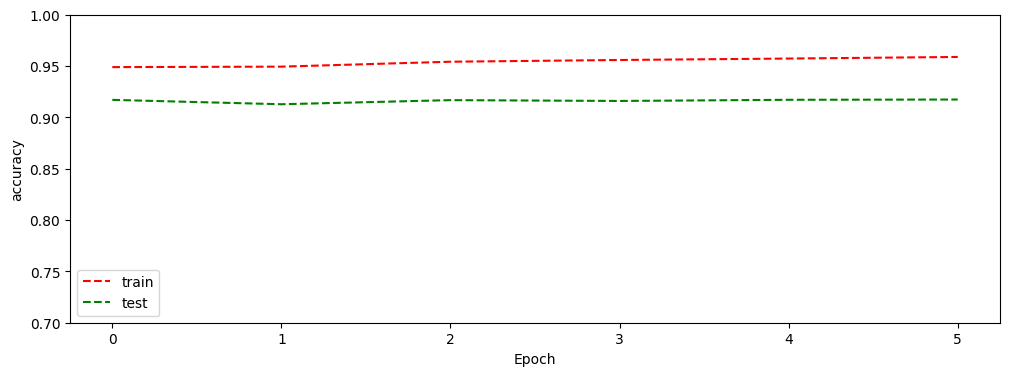

CNN Error: 8.83%


In [20]:
history = model.fit(X_train_cnn,
                    y_train,
                    epochs=100,
                    verbose=1,
                    validation_data = (X_test_cnn, y_test),
                    callbacks = [EarlyStop],
                   )

draw_curves(history, key1='accuracy')

score = model.evaluate(X_val_cnn, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-score[1]*100))

tu error powinien spaść, jest różnie, ale to normalne